#Klasifikasi (dengan Parameter Manual)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah klasifikasi dengan menggunakan algoritma Random Forest yang bertujuan untuk prediksi customer churn pada e-commerce XYZ.

Parameter algoritma klasifikasi yang digunakan yaitu parameter manual(berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu:
1. Skema 2-9 Algoritma Random Forest
2. Skema 2-9 Algoritma SVM
3. Skema 2-9 Algoritma Decision Tree


Fitur yang dipakai adalah 5 fitur yang paling berkolerasi dengan label churn yaitu:

1. Complain
2. PreferedOrderCat
3. MaritalStatus
4. SatisfactionScore
5. NumberOfDeviceRegistered


In [1]:
#Data Loading

import pandas as pd


url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [2]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus', 'SatisfactionScore', 'NumberOfDeviceRegistered']]
df

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,Laptop & Accessory,Single,2,3
1,1,1,Mobile,Single,3,4
2,1,1,Mobile,Single,3,4
3,1,0,Laptop & Accessory,Single,5,4
4,1,0,Mobile,Single,5,3
...,...,...,...,...,...,...
5625,0,0,Laptop & Accessory,Married,1,2
5626,0,0,Fashion,Married,5,5
5627,0,1,Laptop & Accessory,Married,4,2
5628,0,0,Laptop & Accessory,Married,4,5


In [3]:
#Merge Data yang sama

#Di PreferredOrderCat, 'Mobile' dan 'Mobile Phone' digabung
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [4]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Churn                     5630 non-null   int64 
 1   Complain                  5630 non-null   int64 
 2   PreferedOrderCat          5630 non-null   object
 3   MaritalStatus             5630 non-null   object
 4   SatisfactionScore         5630 non-null   int64 
 5   NumberOfDeviceRegistered  5630 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 264.0+ KB


In [5]:
#Encoding

from sklearn.preprocessing import StandardScaler , LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df

<ipython-input-5-bfaa2231e0b8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-5-bfaa2231e0b8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3
...,...,...,...,...,...,...
5625,0,0,2,1,1,2
5626,0,0,0,1,5,5
5627,0,1,2,1,4,2
5628,0,0,2,1,4,5


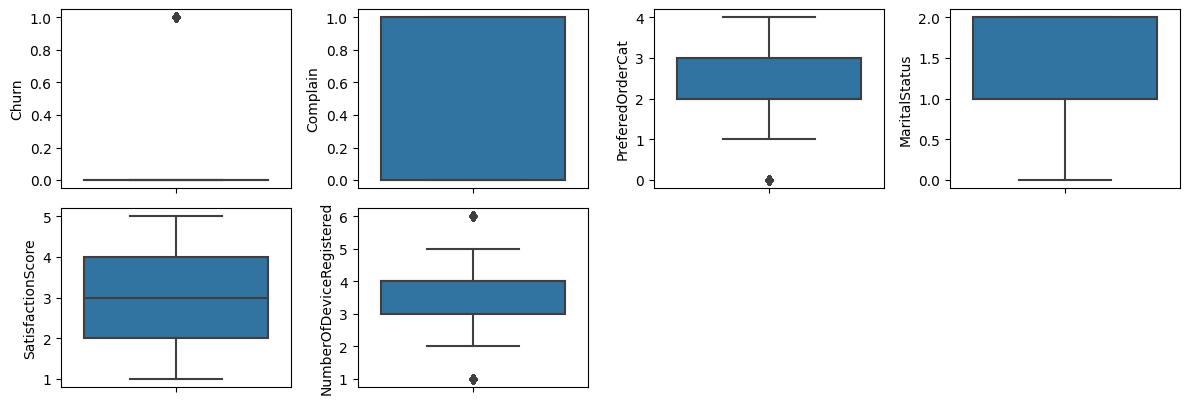

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#BoxPlot untuk melihat outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [7]:
#fungsi untuk trimming outliers dengan IQR (Inter-Quartile Range)

def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus',
       'SatisfactionScore', 'NumberOfDeviceRegistered'],
      dtype='object')

In [8]:
#apply fungsi ke kolom yang memiliki outliers

cols_outliers = ['PreferedOrderCat', 'NumberOfDeviceRegistered']
for col in cols_outliers:
    df = handle_outliers(df , col)

df.head()

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3


In [9]:
#Lihat rangkuman data setelah trimming outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int64
 3   MaritalStatus             4448 non-null   int64
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int64(6)
memory usage: 243.2 KB


In [10]:
#reset index sesuai jumlah baris data

df.reset_index()
df = pd.concat([df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int64
 3   MaritalStatus             4448 non-null   int64
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int64(6)
memory usage: 208.6 KB


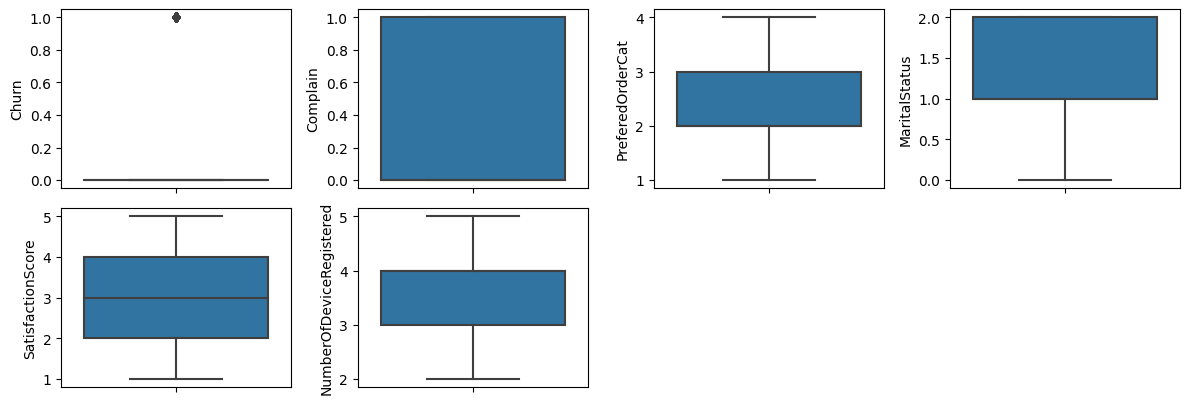

In [11]:
#Boxplot setelah Trimming Outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [12]:
#mengetahui korelasi dari tiap kolom terhadap label churn
#default method in pandas menggunakan Pearson

corr_matrix = df.corr()
corr_matrix

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
Churn,1.000000,0.274961,0.167177,0.156856,0.117313,0.079798
Complain,0.274961,1.000000,0.003805,-0.003698,-0.031006,0.001356
PreferedOrderCat,0.167177,0.003805,1.000000,0.048836,0.014099,0.020725
MaritalStatus,0.156856,-0.003698,0.048836,1.000000,-0.035863,0.044848
SatisfactionScore,0.117313,-0.031006,0.014099,-0.035863,1.000000,-0.008028
NumberOfDeviceRegistered,0.079798,0.001356,0.020725,0.044848,-0.008028,1.000000


<Axes: >

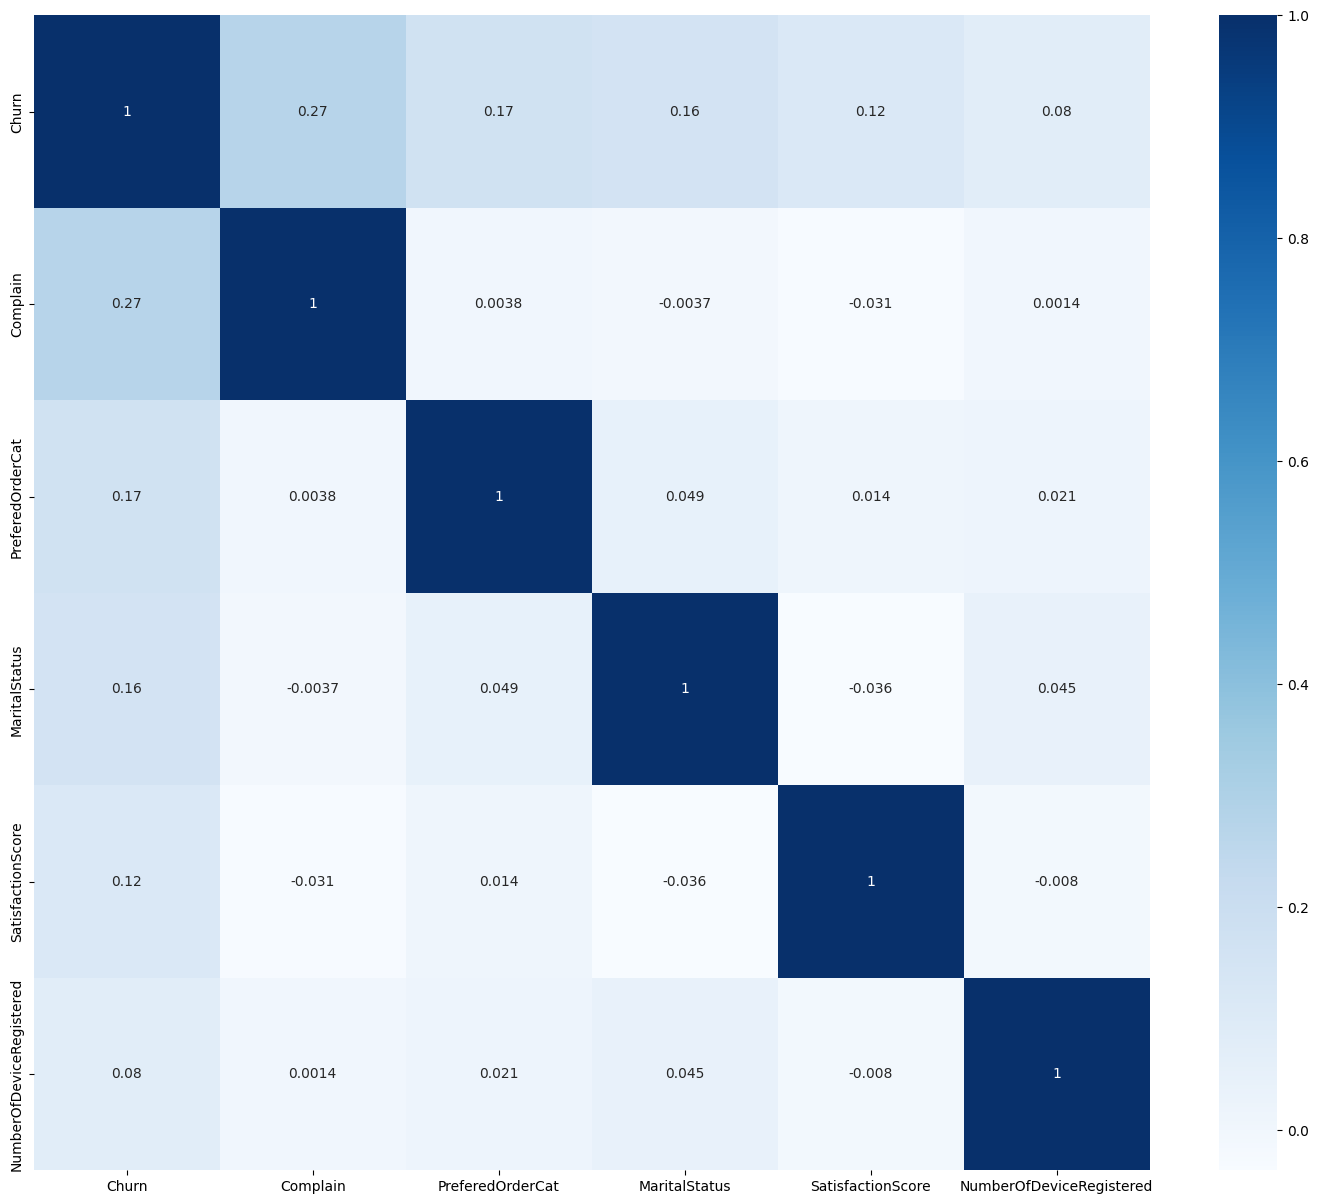

In [13]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [14]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                       1.000000
Complain                    0.274961
PreferedOrderCat            0.167177
MaritalStatus               0.156856
SatisfactionScore           0.117313
NumberOfDeviceRegistered    0.079798
Name: Churn, dtype: float64

In [15]:
#Handling Imbalanced Data

import matplotlib.pyplot as plt
import plotly.express as px

fig = px.histogram(df, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [16]:
#Over-sampling dengan SMOTE = interpolasi data baru dari data minoritas yang besar kemungkinannya membuat sample yang noisy
#Under-sampling dengan Tomek Links = membersihkan noisy samples dengan under-sampling

from imblearn.combine import SMOTETomek

X = df.drop('Churn' , axis = 1)
Y = df['Churn']

smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

x_over.shape, y_over.shape

((7400, 5), (7400,))

#Classification Modelling

Model algoritma yang digunakan yaitu:


1.   Random Forest
2.   SVM
3.   Decision Tree

dengan parameter manual.



In [17]:
#Split Data

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [18]:
#Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

#Skema 2

1. Random Forest
    max_depth = 1000
    min_samples_leaf = 1
    min_samples_split = 2

2. SVM
    kernel = sigmoid
    C = 1
    gamma = 0.1

3. Decision Tree
    max_depth = 1000
    max_samples_leaf = 1
    min_samples_split = 2


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

rf_clf2 = RandomForestClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 2)
svm_clf2 = SVC(kernel = 'sigmoid', C = 1, gamma = 0.1)
dt_clf2 = DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 2)

In [20]:
clf_list2 = [rf_clf2, svm_clf2, dt_clf2]
clf_name_list2 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list2:
  clf.fit(x_train_scaled, y_train)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

train_acc_list2 = []
test_acc_list2 = []

for clf,name in zip(clf_list2,clf_name_list2):
    y_pred_train2 = clf.predict(x_train_scaled)
    y_pred_test2 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train2)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test2)}')
    train_acc_list2.append(accuracy_score(y_train, y_pred_train2))
    test_acc_list2.append(accuracy_score(y_test, y_pred_test2))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Random Forest
Training Score: 0.7843629343629344
Test Score: 0.7666666666666667
Acc Train: 0.7843629343629344
Acc Test: 0.7666666666666667
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.6654440154440154
Test Score: 0.6576576576576577
Acc Train: 0.6654440154440154
Acc Test: 0.6576576576576577
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7843629343629344
Test Score: 0.7684684684684685
Acc Train: 0.7843629343629344
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                               

Accuracy = 0.7666666666666667
Precision = 0.7534364261168385
Recall = 0.7915162454873647
F1-Score = 0.7720070422535211
ROC Area under Curve = 0.7667113601537543
              precision    recall  f1-score   support

           0    0.78125   0.74191   0.76107      1112
           1    0.75344   0.79152   0.77201      1108

    accuracy                        0.76667      2220
   macro avg    0.76734   0.76671   0.76654      2220
weighted avg    0.76737   0.76667   0.76653      2220



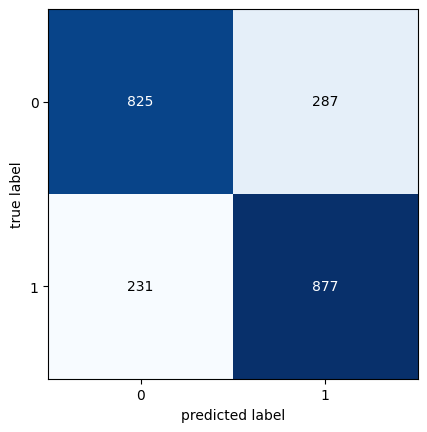

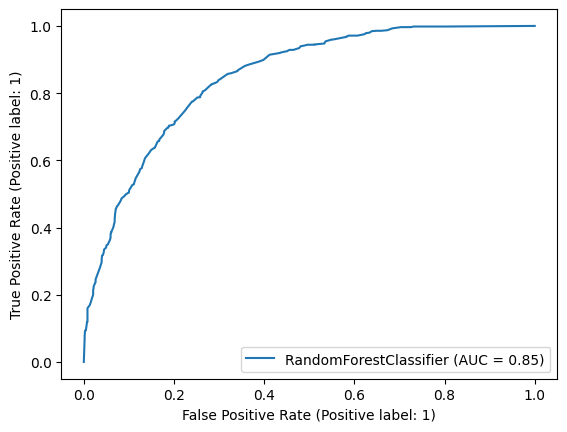

In [22]:
#Evaluasi Random Forest

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

model2rf=RandomForestClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 2)
model2rf.fit(x_train_scaled,y_train)
y_pred2 = model2rf.predict(x_test_scaled)
accuracy2rf = accuracy_score(y_test, y_pred2)
precision2rf = precision_score(y_test, y_pred2)
recall2rf = recall_score(y_test, y_pred2)
f1_2rf = f1_score(y_test, y_pred2)
roc_auc2rf = roc_auc_score(y_test, y_pred2)
print("Accuracy = {}".format(accuracy2rf))
print("Precision = {}".format(precision2rf))
print("Recall = {}".format(recall2rf))
print("F1-Score = {}".format(f1_2rf))
print("ROC Area under Curve = {}".format(roc_auc2rf))
print(classification_report(y_test,y_pred2,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred2))
RocCurveDisplay.from_estimator(model2rf , x_test_scaled , y_test)

Accuracy = 0.6576576576576577
Precision = 0.7032710280373832
Recall = 0.5433212996389891
F1-Score = 0.6130346232179225
ROC Area under Curve = 0.6574520167259694
              precision    recall  f1-score   support

           0    0.62903   0.77158   0.69305      1112
           1    0.70327   0.54332   0.61303      1108

    accuracy                        0.65766      2220
   macro avg    0.66615   0.65745   0.65304      2220
weighted avg    0.66608   0.65766   0.65312      2220



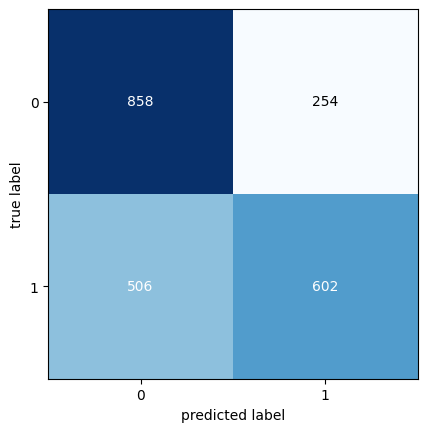

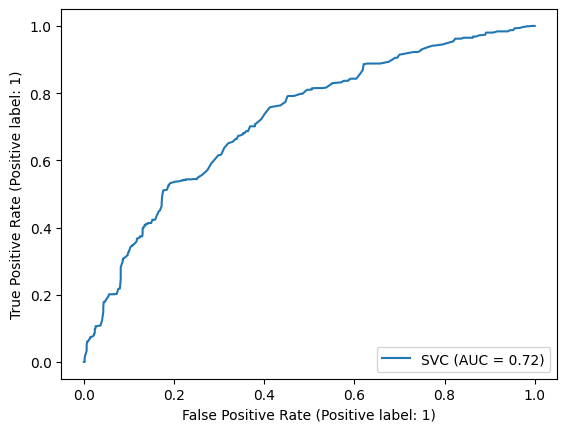

In [23]:
#Evaluasi Support Vector Machine

model2svm=SVC(kernel = 'sigmoid', C = 1, gamma = 0.1)
model2svm.fit(x_train_scaled,y_train)
y_pred2 = model2svm.predict(x_test_scaled)
accuracy2svm = accuracy_score(y_test, y_pred2)
precision2svm = precision_score(y_test, y_pred2)
recall2svm = recall_score(y_test, y_pred2)
f1_2svm = f1_score(y_test, y_pred2)
roc_auc2svm = roc_auc_score(y_test, y_pred2)
print("Accuracy = {}".format(accuracy2svm))
print("Precision = {}".format(precision2svm))
print("Recall = {}".format(recall2svm))
print("F1-Score = {}".format(f1_2svm))
print("ROC Area under Curve = {}".format(roc_auc2svm))
print(classification_report(y_test,y_pred2,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred2))
RocCurveDisplay.from_estimator(model2svm , x_test_scaled , y_test)

Accuracy = 0.7684684684684685
Precision = 0.7582608695652174
Recall = 0.7870036101083032
F1-Score = 0.7723649247121346
ROC Area under Curve = 0.7685018050541516
              precision    recall  f1-score   support

           0    0.77944   0.75000   0.76444      1112
           1    0.75826   0.78700   0.77236      1108

    accuracy                        0.76847      2220
   macro avg    0.76885   0.76850   0.76840      2220
weighted avg    0.76887   0.76847   0.76839      2220



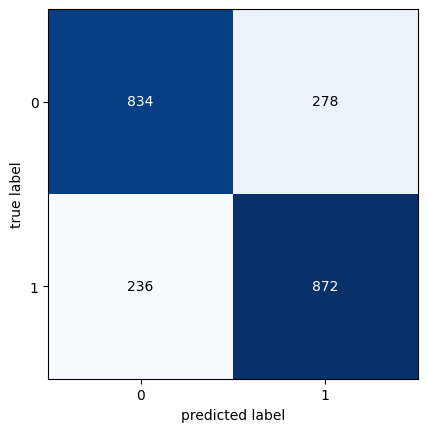

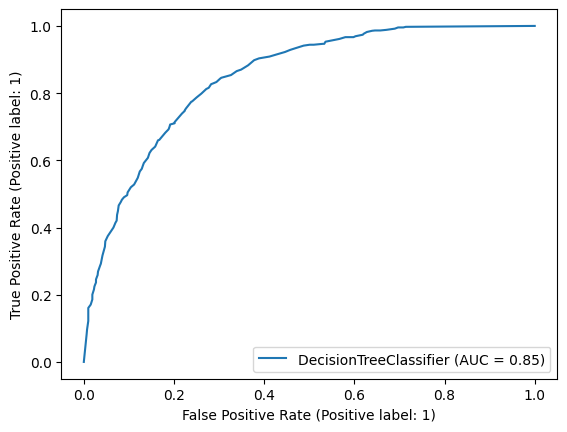

In [24]:
#Evaluasi Decision Tree

model2dt=DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 2)
model2dt.fit(x_train_scaled,y_train)
y_pred2 = model2dt.predict(x_test_scaled)
accuracy2dt = accuracy_score(y_test, y_pred2)
precision2dt = precision_score(y_test, y_pred2)
recall2dt = recall_score(y_test, y_pred2)
f1_2dt = f1_score(y_test, y_pred2)
roc_auc2dt = roc_auc_score(y_test, y_pred2)
print("Accuracy = {}".format(accuracy2dt))
print("Precision = {}".format(precision2dt))
print("Recall = {}".format(recall2dt))
print("F1-Score = {}".format(f1_2dt))
print("ROC Area under Curve = {}".format(roc_auc2dt))
print(classification_report(y_test,y_pred2,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred2))
RocCurveDisplay.from_estimator(model2dt , x_test_scaled , y_test)

#Skema 3

1. Random Forest
    max_depth = 1000
    min_samples_leaf = 1
    min_samples_split = 10

2. SVM
    kernel = sigmoid
    C = 1
    gamma = 1

3. Decision Tree
    max_depth = 1000
    max_samples_leaf = 1
    min_samples_split = 10


In [25]:
rf_clf3 = RandomForestClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 10)
svm_clf3 = SVC(kernel = 'sigmoid', C = 1, gamma = 1)
dt_clf3 = DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 10)

In [26]:
clf_list3 = [rf_clf3, svm_clf3, dt_clf3]
clf_name_list3 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list3:
  clf.fit(x_train_scaled, y_train)

In [27]:
train_acc_list3 = []
test_acc_list3 = []

for clf,name in zip(clf_list3,clf_name_list3):
    y_pred_train3 = clf.predict(x_train_scaled)
    y_pred_test3 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train3)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test3)}')
    train_acc_list3.append(accuracy_score(y_train, y_pred_train3))
    test_acc_list3.append(accuracy_score(y_test, y_pred_test3))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Random Forest
Training Score: 0.7835907335907336
Test Score: 0.7684684684684685
Acc Train: 0.7835907335907336
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.3716216216216216
Test Score: 0.35630630630630633
Acc Train: 0.3716216216216216
Acc Test: 0.35630630630630633
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7833976833976835
Test Score: 0.7707207207207207
Acc Train: 0.7833976833976835
Acc Test: 0.7707207207207207
                                                            
************************************************************
                                             

Accuracy = 0.7680180180180181
Precision = 0.7558239861949957
Recall = 0.7906137184115524
F1-Score = 0.7728275253639171
ROC Area under Curve = 0.7680586577669273
              precision    recall  f1-score   support

           0    0.78134   0.74550   0.76300      1112
           1    0.75582   0.79061   0.77283      1108

    accuracy                        0.76802      2220
   macro avg    0.76858   0.76806   0.76791      2220
weighted avg    0.76860   0.76802   0.76791      2220



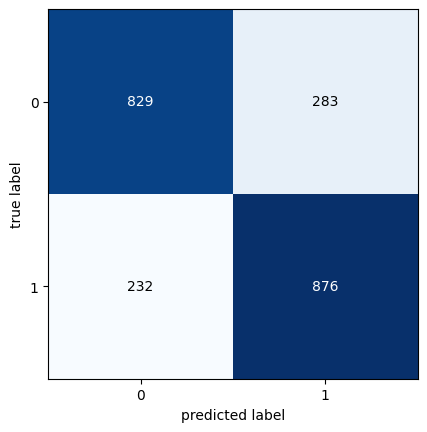

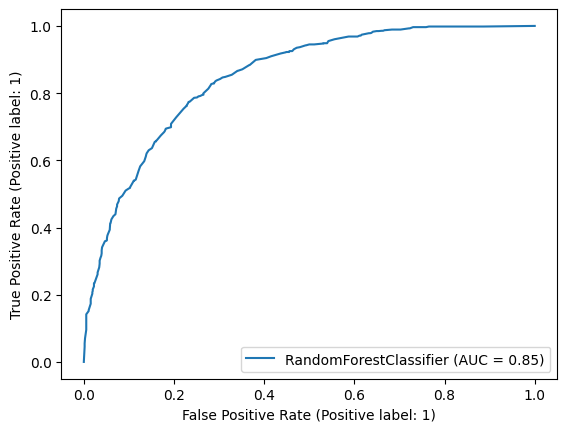

In [28]:
#Evaluasi Random Forest


model3rf=RandomForestClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 10)
model3rf.fit(x_train_scaled,y_train)
y_pred3 = model3rf.predict(x_test_scaled)
accuracy3rf = accuracy_score(y_test, y_pred3)
precision3rf = precision_score(y_test, y_pred3)
recall3rf = recall_score(y_test, y_pred3)
f1_3rf = f1_score(y_test, y_pred3)
roc_auc3rf = roc_auc_score(y_test, y_pred3)
print("Accuracy = {}".format(accuracy3rf))
print("Precision = {}".format(precision3rf))
print("Recall = {}".format(recall3rf))
print("F1-Score = {}".format(f1_3rf))
print("ROC Area under Curve = {}".format(roc_auc3rf))
print(classification_report(y_test,y_pred3,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred3))
RocCurveDisplay.from_estimator(model3rf , x_test_scaled , y_test)

Accuracy = 0.35630630630630633
Precision = 0.3619948409286328
Recall = 0.3799638989169675
F1-Score = 0.3707617789520035
ROC Area under Curve = 0.3563488559333039
              precision    recall  f1-score   support

           0    0.35005   0.33273   0.34117      1112
           1    0.36199   0.37996   0.37076      1108

    accuracy                        0.35631      2220
   macro avg    0.35602   0.35635   0.35597      2220
weighted avg    0.35601   0.35631   0.35594      2220



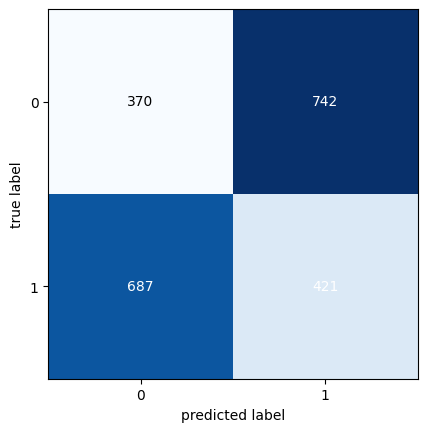

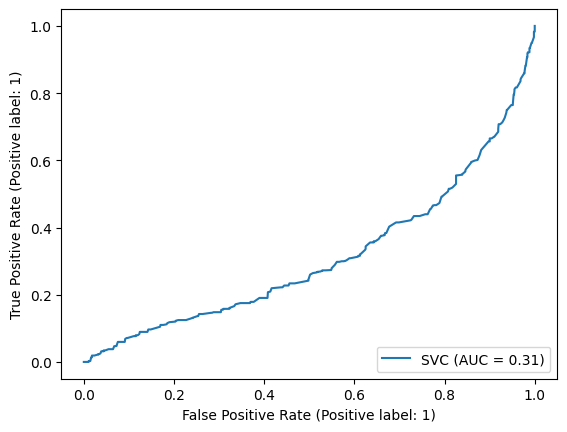

In [29]:
#Evaluasi Support Vector Machine

model3svm=SVC(kernel = 'sigmoid', C = 1, gamma = 1)
model3svm.fit(x_train_scaled,y_train)
y_pred3 = model3svm.predict(x_test_scaled)
accuracy3svm = accuracy_score(y_test, y_pred3)
precision3svm = precision_score(y_test, y_pred3)
recall3svm = recall_score(y_test, y_pred3)
f1_3svm = f1_score(y_test, y_pred3)
roc_auc3svm = roc_auc_score(y_test, y_pred3)
print("Accuracy = {}".format(accuracy3svm))
print("Precision = {}".format(precision3svm))
print("Recall = {}".format(recall3svm))
print("F1-Score = {}".format(f1_3svm))
print("ROC Area under Curve = {}".format(roc_auc3svm))
print(classification_report(y_test,y_pred3,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred3))
RocCurveDisplay.from_estimator(model3svm , x_test_scaled , y_test)

Accuracy = 0.7707207207207207
Precision = 0.7606614447345518
Recall = 0.7888086642599278
F1-Score = 0.7744793974302171
ROC Area under Curve = 0.7707532529932732
              precision    recall  f1-score   support

           0    0.78151   0.75270   0.76683      1112
           1    0.76066   0.78881   0.77448      1108

    accuracy                        0.77072      2220
   macro avg    0.77109   0.77075   0.77066      2220
weighted avg    0.77111   0.77072   0.77065      2220



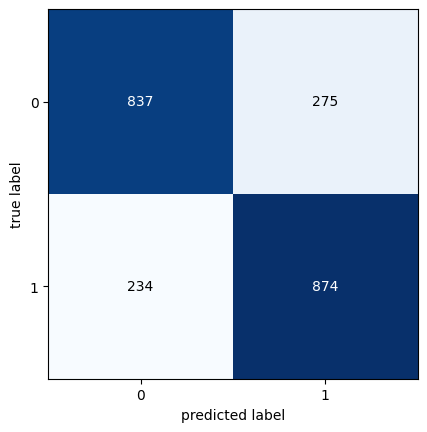

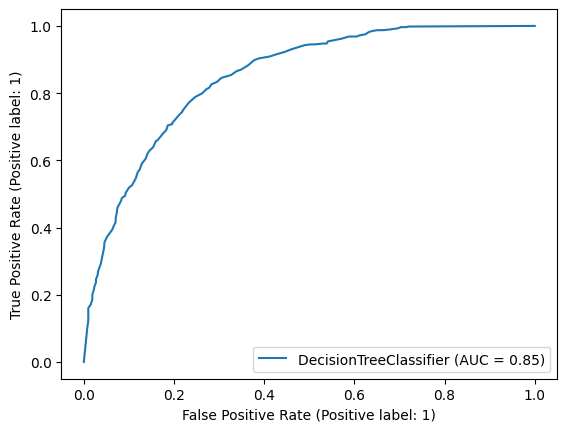

In [30]:
#Evaluasi Decision Tree

model3dt=DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 1, min_samples_split = 10)
model3dt.fit(x_train_scaled,y_train)
y_pred3 = model3dt.predict(x_test_scaled)
accuracy3dt = accuracy_score(y_test, y_pred3)
precision3dt = precision_score(y_test, y_pred3)
recall3dt = recall_score(y_test, y_pred3)
f1_3dt = f1_score(y_test, y_pred3)
roc_auc3dt = roc_auc_score(y_test, y_pred3)
print("Accuracy = {}".format(accuracy3dt))
print("Precision = {}".format(precision3dt))
print("Recall = {}".format(recall3dt))
print("F1-Score = {}".format(f1_3dt))
print("ROC Area under Curve = {}".format(roc_auc3dt))
print(classification_report(y_test,y_pred3,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred3))
RocCurveDisplay.from_estimator(model3dt , x_test_scaled , y_test)

# Skema 4
1. Random Forest max_depth = 1000 min_samples_leaf = 5 min_samples_split = 2

2. SVM kernel = sigmoid C = 10 gamma = 0.1

3. Decision Tree max_depth = 1000 max_samples_leaf = 5 min_samples_split = 2

In [31]:
rf_clf4 = RandomForestClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 2)
svm_clf4 = SVC(kernel = 'sigmoid', C = 10, gamma = 0.1)
dt_clf4 = DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 2)

In [32]:
clf_list4 = [rf_clf4, svm_clf4, dt_clf4]
clf_name_list4 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list4:
  clf.fit(x_train_scaled, y_train)

In [33]:
train_acc_list4 = []
test_acc_list4 = []

for clf,name in zip(clf_list4,clf_name_list4):
    y_pred_train4 = clf.predict(x_train_scaled)
    y_pred_test4 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train4)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test4)}')
    train_acc_list4.append(accuracy_score(y_train, y_pred_train4))
    test_acc_list4.append(accuracy_score(y_test, y_pred_test4))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Random Forest
Training Score: 0.7781853281853282
Test Score: 0.7657657657657657
Acc Train: 0.7781853281853282
Acc Test: 0.7657657657657657
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.6328185328185328
Test Score: 0.6378378378378379
Acc Train: 0.6328185328185328
Acc Test: 0.6378378378378379
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7806949806949807
Test Score: 0.7684684684684685
Acc Train: 0.7806949806949807
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                               

Accuracy = 0.7662162162162162
Precision = 0.7594713656387665
Recall = 0.7779783393501805
F1-Score = 0.7686134641105663
ROC Area under Curve = 0.7662373711139391
              precision    recall  f1-score   support

           0    0.77327   0.75450   0.76377      1112
           1    0.75947   0.77798   0.76861      1108

    accuracy                        0.76622      2220
   macro avg    0.76637   0.76624   0.76619      2220
weighted avg    0.76638   0.76622   0.76619      2220



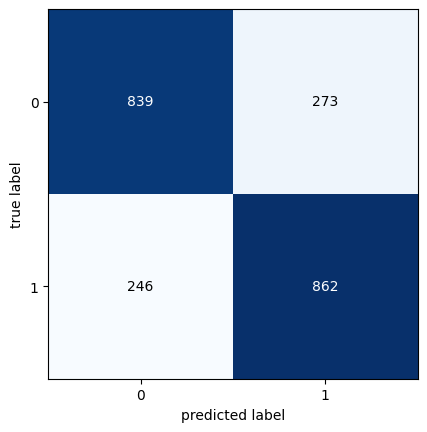

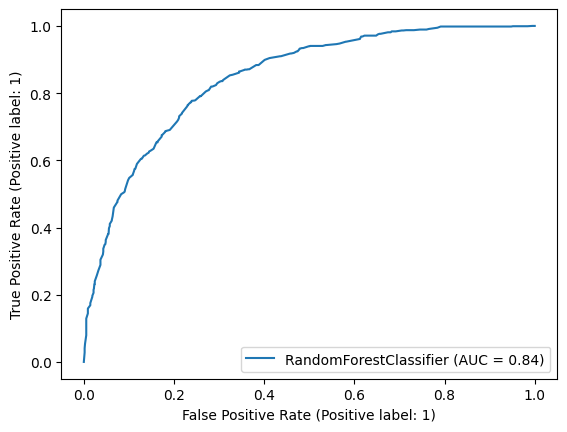

In [34]:
#Evaluasi Random Forest


model4rf=RandomForestClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 2)
model4rf.fit(x_train_scaled,y_train)
y_pred4 = model4rf.predict(x_test_scaled)
accuracy4rf = accuracy_score(y_test, y_pred4)
precision4rf = precision_score(y_test, y_pred4)
recall4rf = recall_score(y_test, y_pred4)
f1_4rf = f1_score(y_test, y_pred4)
roc_auc4rf = roc_auc_score(y_test, y_pred4)
print("Accuracy = {}".format(accuracy4rf))
print("Precision = {}".format(precision4rf))
print("Recall = {}".format(recall4rf))
print("F1-Score = {}".format(f1_4rf))
print("ROC Area under Curve = {}".format(roc_auc4rf))
print(classification_report(y_test,y_pred4,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred4))
RocCurveDisplay.from_estimator(model4rf , x_test_scaled , y_test)


Accuracy = 0.6378378378378379
Precision = 0.7134831460674157
Recall = 0.4584837545126354
F1-Score = 0.5582417582417583
ROC Area under Curve = 0.6375152585512818
              precision    recall  f1-score   support

           0    0.60212   0.81655   0.69313      1112
           1    0.71348   0.45848   0.55824      1108

    accuracy                        0.63784      2220
   macro avg    0.65780   0.63752   0.62569      2220
weighted avg    0.65770   0.63784   0.62581      2220



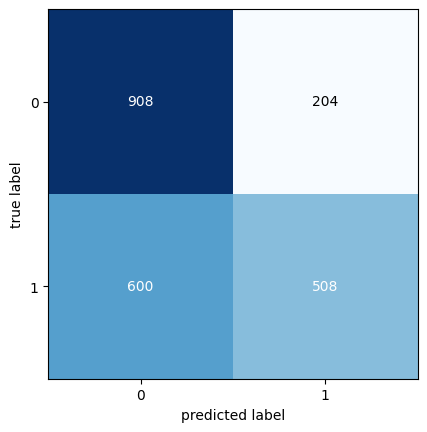

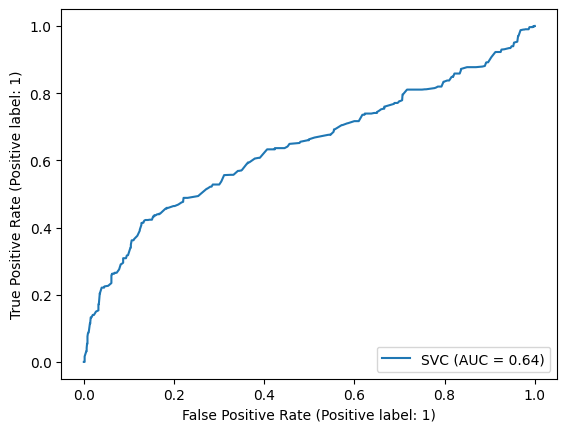

In [35]:
#Evaluasi Support Vector Machine

model4svm=SVC(kernel = 'sigmoid', C = 10, gamma = 0.1)
model4svm.fit(x_train_scaled,y_train)
y_pred4 = model4svm.predict(x_test_scaled)
accuracy4svm = accuracy_score(y_test, y_pred4)
precision4svm = precision_score(y_test, y_pred4)
recall4svm = recall_score(y_test, y_pred4)
f1_4svm = f1_score(y_test, y_pred4)
roc_auc4svm = roc_auc_score(y_test, y_pred4)
print("Accuracy = {}".format(accuracy4svm))
print("Precision = {}".format(precision4svm))
print("Recall = {}".format(recall4svm))
print("F1-Score = {}".format(f1_4svm))
print("ROC Area under Curve = {}".format(roc_auc4svm))
print(classification_report(y_test,y_pred4,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred4))
RocCurveDisplay.from_estimator(model4svm , x_test_scaled , y_test)


Accuracy = 0.7684684684684685
Precision = 0.7591623036649214
Recall = 0.7851985559566786
F1-Score = 0.7719609582963619
ROC Area under Curve = 0.7684985585538789
              precision    recall  f1-score   support

           0    0.77840   0.75180   0.76487      1112
           1    0.75916   0.78520   0.77196      1108

    accuracy                        0.76847      2220
   macro avg    0.76878   0.76850   0.76841      2220
weighted avg    0.76880   0.76847   0.76841      2220



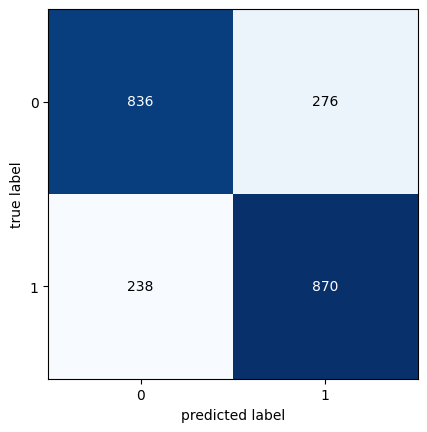

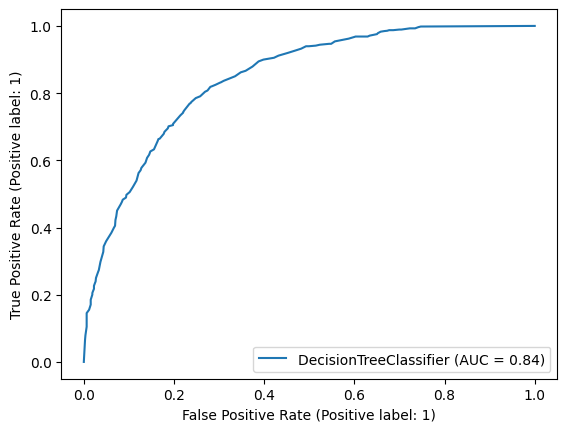

In [36]:
#Evaluasi Decision Tree

model4dt=DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 2)
model4dt.fit(x_train_scaled,y_train)
y_pred4 = model4dt.predict(x_test_scaled)
accuracy4dt = accuracy_score(y_test, y_pred4)
precision4dt = precision_score(y_test, y_pred4)
recall4dt = recall_score(y_test, y_pred4)
f1_4dt = f1_score(y_test, y_pred4)
roc_auc4dt = roc_auc_score(y_test, y_pred4)
print("Accuracy = {}".format(accuracy4dt))
print("Precision = {}".format(precision4dt))
print("Recall = {}".format(recall4dt))
print("F1-Score = {}".format(f1_4dt))
print("ROC Area under Curve = {}".format(roc_auc4dt))
print(classification_report(y_test,y_pred4,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred4))
RocCurveDisplay.from_estimator(model4dt , x_test_scaled , y_test)


# Skema 5
1. Random Forest max_depth = 1000 min_samples_leaf = 5 min_samples_split = 10

2. SVM kernel = sigmoid C = 10 gamma = 1

3. Decision Tree max_depth = 1000 max_samples_leaf = 5 min_samples_split = 10

In [37]:
rf_clf5 = RandomForestClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 10)
svm_clf5 = SVC(kernel = 'sigmoid', C = 10, gamma = 1)
dt_clf5 = DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 10)

In [38]:
clf_list5 = [rf_clf5, svm_clf5, dt_clf5]
clf_name_list5 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list5:
  clf.fit(x_train_scaled, y_train)

In [39]:
train_acc_list5 = []
test_acc_list5 = []

for clf,name in zip(clf_list5,clf_name_list5):
    y_pred_train5 = clf.predict(x_train_scaled)
    y_pred_test5 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train5)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test5)}')
    train_acc_list5.append(accuracy_score(y_train, y_pred_train5))
    test_acc_list5.append(accuracy_score(y_test, y_pred_test5))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Random Forest
Training Score: 0.7785714285714286
Test Score: 0.7671171171171172
Acc Train: 0.7785714285714286
Acc Test: 0.7671171171171172
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.37104247104247107
Test Score: 0.3572072072072072
Acc Train: 0.37104247104247107
Acc Test: 0.3572072072072072
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7806949806949807
Test Score: 0.7684684684684685
Acc Train: 0.7806949806949807
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                             

Accuracy = 0.7662162162162162
Precision = 0.7558644656820156
Recall = 0.7851985559566786
F1-Score = 0.7702523240371846
ROC Area under Curve = 0.7662503571150301
              precision    recall  f1-score   support

           0    0.78151   0.75270   0.76683      1112
           1    0.76066   0.78881   0.77448      1108

    accuracy                        0.77072      2220
   macro avg    0.77109   0.77075   0.77066      2220
weighted avg    0.77111   0.77072   0.77065      2220



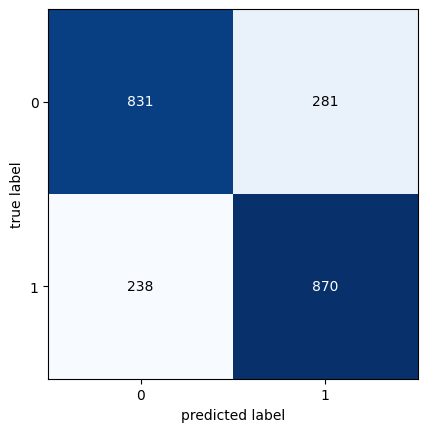

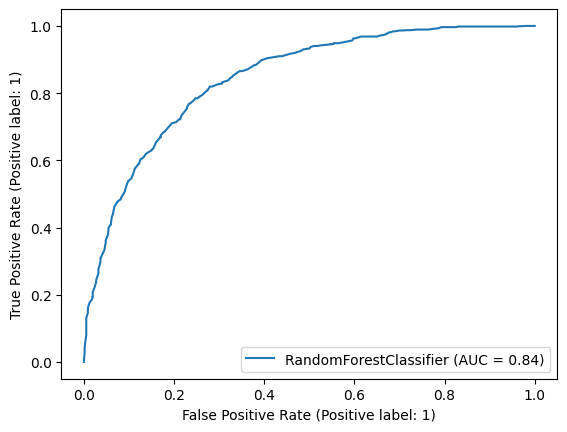

In [40]:
#Evaluasi Random Forest


model5rf=RandomForestClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 10)
model5rf.fit(x_train_scaled,y_train)
y_pred5 = model5rf.predict(x_test_scaled)
accuracy5rf = accuracy_score(y_test, y_pred5)
precision5rf = precision_score(y_test, y_pred5)
recall5rf = recall_score(y_test, y_pred5)
f1_5rf = f1_score(y_test, y_pred5)
roc_auc5rf = roc_auc_score(y_test, y_pred5)
print("Accuracy = {}".format(accuracy5rf))
print("Precision = {}".format(precision5rf))
print("Recall = {}".format(recall5rf))
print("F1-Score = {}".format(f1_5rf))
print("ROC Area under Curve = {}".format(roc_auc5rf))
print(classification_report(y_test,y_pred3,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred5))
RocCurveDisplay.from_estimator(model5rf , x_test_scaled , y_test)

Accuracy = 0.3572072072072072
Precision = 0.36142484795829716
Recall = 0.37545126353790614
F1-Score = 0.3683045595396193
ROC Area under Curve = 0.3572400202581617
              precision    recall  f1-score   support

           0    0.35267   0.33903   0.34571      1112
           1    0.36142   0.37545   0.36830      1108

    accuracy                        0.35721      2220
   macro avg    0.35705   0.35724   0.35701      2220
weighted avg    0.35704   0.35721   0.35699      2220



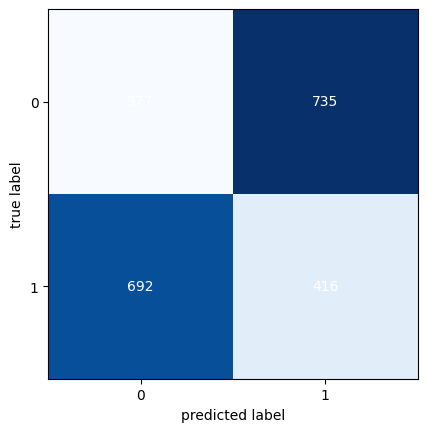

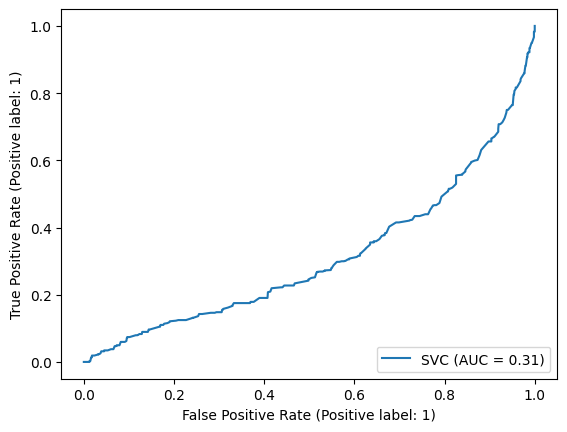

In [41]:
#Evaluasi Support Vector Machine

model5svm=SVC(kernel = 'sigmoid', C = 10, gamma = 1)
model5svm.fit(x_train_scaled,y_train)
y_pred5 = model5svm.predict(x_test_scaled)
accuracy5svm = accuracy_score(y_test, y_pred5)
precision5svm = precision_score(y_test, y_pred5)
recall5svm = recall_score(y_test, y_pred5)
f1_5svm = f1_score(y_test, y_pred5)
roc_auc5svm = roc_auc_score(y_test, y_pred5)
print("Accuracy = {}".format(accuracy5svm))
print("Precision = {}".format(precision5svm))
print("Recall = {}".format(recall5svm))
print("F1-Score = {}".format(f1_5svm))
print("ROC Area under Curve = {}".format(roc_auc5svm))
print(classification_report(y_test,y_pred5,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred5))
RocCurveDisplay.from_estimator(model5svm , x_test_scaled , y_test)

Accuracy = 0.7684684684684685
Precision = 0.7591623036649214
Recall = 0.7851985559566786
F1-Score = 0.7719609582963619
ROC Area under Curve = 0.7684985585538789
              precision    recall  f1-score   support

           0    0.77840   0.75180   0.76487      1112
           1    0.75916   0.78520   0.77196      1108

    accuracy                        0.76847      2220
   macro avg    0.76878   0.76850   0.76841      2220
weighted avg    0.76880   0.76847   0.76841      2220



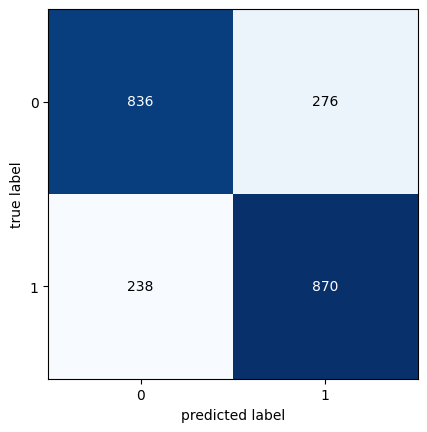

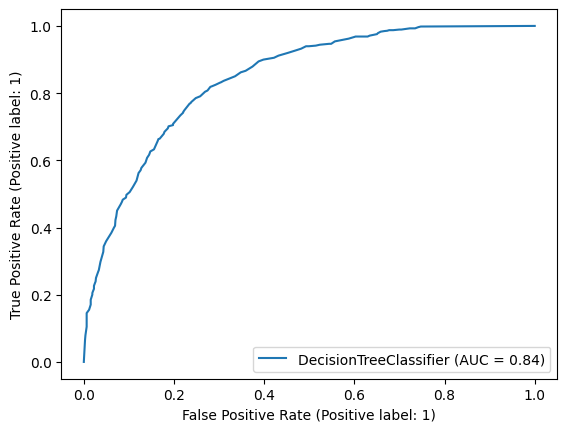

In [42]:
#Evaluasi Decision Tree

model5dt=DecisionTreeClassifier(max_depth = 1000, min_samples_leaf = 5, min_samples_split = 10)
model5dt.fit(x_train_scaled,y_train)
y_pred5 = model5dt.predict(x_test_scaled)
accuracy5dt = accuracy_score(y_test, y_pred5)
precision5dt = precision_score(y_test, y_pred5)
recall5dt = recall_score(y_test, y_pred5)
f1_5dt = f1_score(y_test, y_pred5)
roc_auc5dt = roc_auc_score(y_test, y_pred5)
print("Accuracy = {}".format(accuracy5dt))
print("Precision = {}".format(precision5dt))
print("Recall = {}".format(recall5dt))
print("F1-Score = {}".format(f1_5dt))
print("ROC Area under Curve = {}".format(roc_auc5dt))
print(classification_report(y_test,y_pred5,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred5))
RocCurveDisplay.from_estimator(model5dt , x_test_scaled , y_test)

#Skema 6

1. Random Forest
    max_depth = 500
    min_samples_leaf = 1
    min_samples_split = 2

2. SVM
    kernel = rbf
    C = 1
    gamma = 0.1

3. Decision Tree
    max_depth = 500
    max_samples_leaf = 1
    min_samples_split = 2


In [43]:
rf_clf6 = RandomForestClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 2)
svm_clf6 = SVC(kernel = 'rbf', C = 1, gamma = 0.1)
dt_clf6 = DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 2)

In [44]:
clf_list6 = [rf_clf6, svm_clf6, dt_clf6]
clf_name_list6 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list6:
  clf.fit(x_train_scaled, y_train)

In [45]:
train_acc_list6 = []
test_acc_list6 = []

for clf,name in zip(clf_list6,clf_name_list6):
    y_pred_train6 = clf.predict(x_train_scaled)
    y_pred_test6 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train6)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test6)}')
    train_acc_list6.append(accuracy_score(y_train, y_pred_train6))
    test_acc_list6.append(accuracy_score(y_test, y_pred_test6))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Random Forest
Training Score: 0.7843629343629344
Test Score: 0.7671171171171172
Acc Train: 0.7843629343629344
Acc Test: 0.7671171171171172
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.7121621621621622
Test Score: 0.7022522522522523
Acc Train: 0.7121621621621622
Acc Test: 0.7022522522522523
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7843629343629344
Test Score: 0.7684684684684685
Acc Train: 0.7843629343629344
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                               

Accuracy = 0.7662162162162162
Precision = 0.7514944491887275
Recall = 0.7942238267148014
F1-Score = 0.7722685388328214
ROC Area under Curve = 0.7662665896163935
              precision    recall  f1-score   support

           0   0.782650  0.738309  0.759833      1112
           1   0.751494  0.794224  0.772269      1108

    accuracy                       0.766216      2220
   macro avg   0.767072  0.766267  0.766051      2220
weighted avg   0.767100  0.766216  0.766040      2220



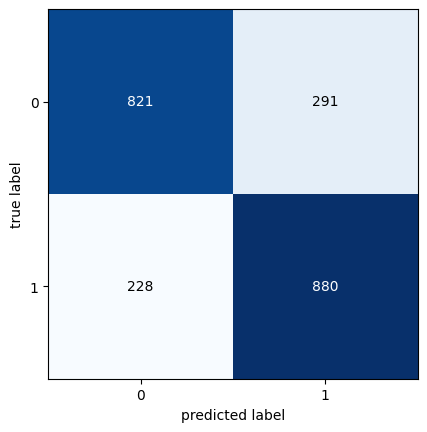

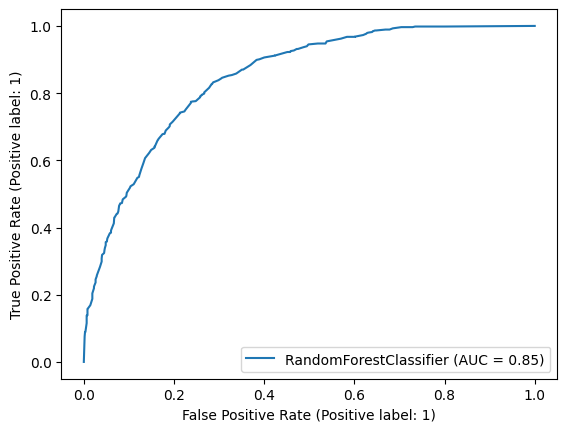

In [46]:
#Evaluasi Random Forest


model6rf=RandomForestClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 2)
model6rf.fit(x_train_scaled,y_train)
y_pred6 = model6rf.predict(x_test_scaled)
accuracy6rf = accuracy_score(y_test, y_pred6)
precision6rf = precision_score(y_test, y_pred6)
recall6rf = recall_score(y_test, y_pred6)
f1_6rf = f1_score(y_test, y_pred6)
roc_auc6rf = roc_auc_score(y_test, y_pred6)
print("Accuracy = {}".format(accuracy6rf))
print("Precision = {}".format(precision6rf))
print("Recall = {}".format(recall6rf))
print("F1-Score = {}".format(f1_6rf))
print("ROC Area under Curve = {}".format(roc_auc6rf))
print(classification_report(y_test,y_pred6,digits=6))
plot_confusion_matrix(confusion_matrix(y_test , y_pred6))
RocCurveDisplay.from_estimator(model6rf , x_test_scaled , y_test)

Accuracy = 0.7022522522522523
Precision = 0.7155255544840887
Recall = 0.6696750902527075
F1-Score = 0.6918414918414919
ROC Area under Curve = 0.7021936602342675
              precision    recall  f1-score   support

           0   0.690617  0.734712  0.711983      1112
           1   0.715526  0.669675  0.691841      1108

    accuracy                       0.702252      2220
   macro avg   0.703071  0.702194  0.701912      2220
weighted avg   0.703049  0.702252  0.701930      2220



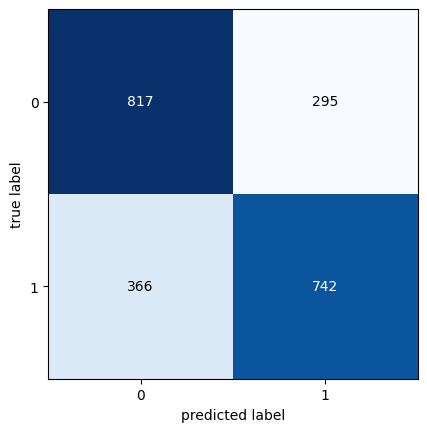

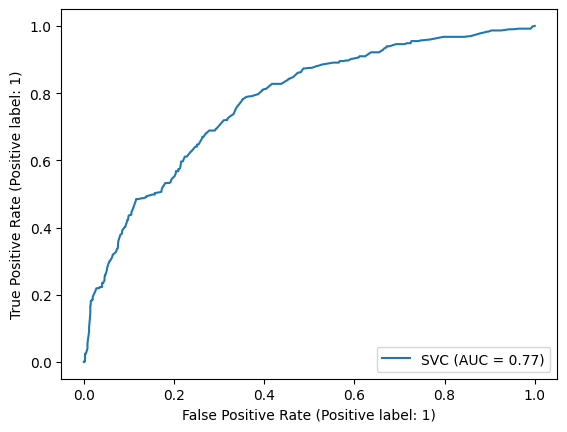

In [47]:
#Evaluasi Support Vector Machine

model6svm=SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model6svm.fit(x_train_scaled,y_train)
y_pred6 = model6svm.predict(x_test_scaled)
accuracy6svm = accuracy_score(y_test, y_pred6)
precision6svm = precision_score(y_test, y_pred6)
recall6svm = recall_score(y_test, y_pred6)
f1_6svm = f1_score(y_test, y_pred6)
roc_auc6svm = roc_auc_score(y_test, y_pred6)
print("Accuracy = {}".format(accuracy6svm))
print("Precision = {}".format(precision6svm))
print("Recall = {}".format(recall6svm))
print("F1-Score = {}".format(f1_6svm))
print("ROC Area under Curve = {}".format(roc_auc6svm))
print(classification_report(y_test,y_pred6,digits=6))
plot_confusion_matrix(confusion_matrix(y_test , y_pred6))
RocCurveDisplay.from_estimator(model6svm , x_test_scaled , y_test)

Accuracy = 0.7684684684684685
Precision = 0.7582608695652174
Recall = 0.7870036101083032
F1-Score = 0.7723649247121346
ROC Area under Curve = 0.7685018050541516
              precision    recall  f1-score   support

           0   0.779439  0.750000  0.764436      1112
           1   0.758261  0.787004  0.772365      1108

    accuracy                       0.768468      2220
   macro avg   0.768850  0.768502  0.768401      2220
weighted avg   0.768869  0.768468  0.768393      2220



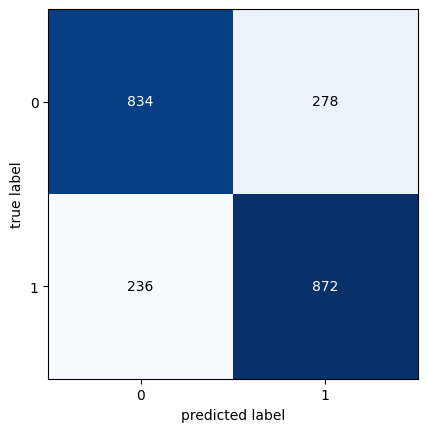

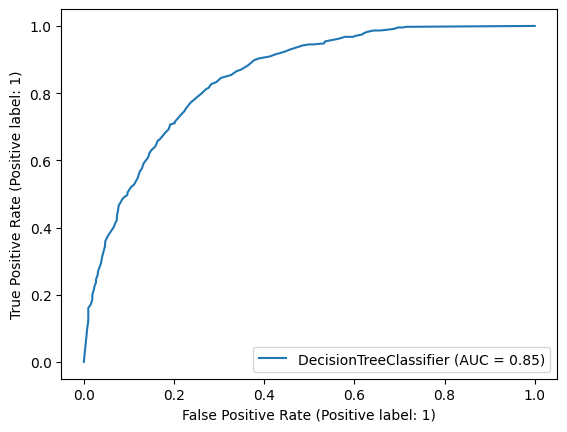

In [48]:
#Evaluasi Decision Tree

model6dt=DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 2)
model6dt.fit(x_train_scaled,y_train)
y_pred6 = model6dt.predict(x_test_scaled)
accuracy6dt = accuracy_score(y_test, y_pred6)
precision6dt = precision_score(y_test, y_pred6)
recall6dt = recall_score(y_test, y_pred6)
f1_6dt = f1_score(y_test, y_pred6)
roc_auc6dt = roc_auc_score(y_test, y_pred6)
print("Accuracy = {}".format(accuracy6dt))
print("Precision = {}".format(precision6dt))
print("Recall = {}".format(recall6dt))
print("F1-Score = {}".format(f1_6dt))
print("ROC Area under Curve = {}".format(roc_auc6dt))
print(classification_report(y_test,y_pred6,digits=6))
plot_confusion_matrix(confusion_matrix(y_test , y_pred6))
RocCurveDisplay.from_estimator(model6dt , x_test_scaled , y_test)

#Skema 7

1. Random Forest
    max_depth = 500
    min_samples_leaf = 1
    min_samples_split = 10

2. SVM
    kernel = sigmoid
    C = 1
    gamma = 0.1

3. Decision Tree
    max_depth = 500
    max_samples_leaf = 1
    min_samples_split = 2


In [49]:
rf_clf7 = RandomForestClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 10)
svm_clf7 = SVC(kernel = 'rbf', C = 1, gamma = 1)
dt_clf7 = DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 10)

In [50]:
clf_list7 = [rf_clf7, svm_clf7, dt_clf7]
clf_name_list7 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list7:
  clf.fit(x_train_scaled, y_train)

In [51]:
train_acc_list7 = []
test_acc_list7 = []

for clf,name in zip(clf_list7,clf_name_list7):
    y_pred_train7 = clf.predict(x_train_scaled)
    y_pred_test7 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train7)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test7)}')
    train_acc_list7.append(accuracy_score(y_train, y_pred_train7))
    test_acc_list7.append(accuracy_score(y_test, y_pred_test7))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)


Using model: Random Forest
Training Score: 0.7835907335907336
Test Score: 0.7707207207207207
Acc Train: 0.7835907335907336
Acc Test: 0.7707207207207207
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.7411196911196911
Test Score: 0.7315315315315315
Acc Train: 0.7411196911196911
Acc Test: 0.7315315315315315
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7833976833976835
Test Score: 0.7707207207207207
Acc Train: 0.7833976833976835
Acc Test: 0.7707207207207207
                                                            
************************************************************
                                               

Accuracy = 0.7666666666666667
Precision = 0.7538726333907056
Recall = 0.7906137184115524
F1-Score = 0.7718061674008809
ROC Area under Curve = 0.766709736903618
              precision    recall  f1-score   support

           0    0.78072   0.74281   0.76129      1112
           1    0.75387   0.79061   0.77181      1108

    accuracy                        0.76667      2220
   macro avg    0.76730   0.76671   0.76655      2220
weighted avg    0.76732   0.76667   0.76654      2220



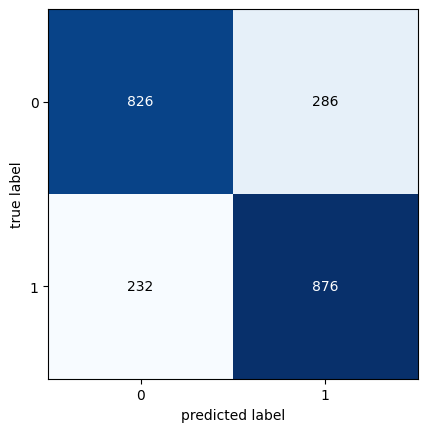

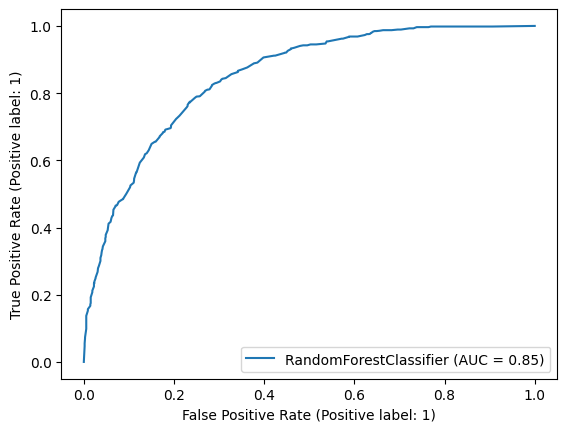

In [52]:
#Evaluasi Random Forest


model7rf=RandomForestClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 10)
model7rf.fit(x_train_scaled,y_train)
y_pred7 = model7rf.predict(x_test_scaled)
accuracy7rf = accuracy_score(y_test, y_pred7)
precision7rf = precision_score(y_test, y_pred7)
recall7rf = recall_score(y_test, y_pred7)
f1_7rf = f1_score(y_test, y_pred7)
roc_auc7rf = roc_auc_score(y_test, y_pred7)
print("Accuracy = {}".format(accuracy7rf))
print("Precision = {}".format(precision7rf))
print("Recall = {}".format(recall7rf))
print("F1-Score = {}".format(f1_7rf))
print("ROC Area under Curve = {}".format(roc_auc7rf))
print(classification_report(y_test,y_pred7,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred7))
RocCurveDisplay.from_estimator(model7rf , x_test_scaled , y_test)

Accuracy = 0.7315315315315315
Precision = 0.7554890219560878
Recall = 0.6832129963898917
F1-Score = 0.7175355450236967
ROC Area under Curve = 0.7314446276913488
              precision    recall  f1-score   support

           0    0.71182   0.77968   0.74421      1112
           1    0.75549   0.68321   0.71754      1108

    accuracy                        0.73153      2220
   macro avg    0.73366   0.73144   0.73087      2220
weighted avg    0.73362   0.73153   0.73089      2220



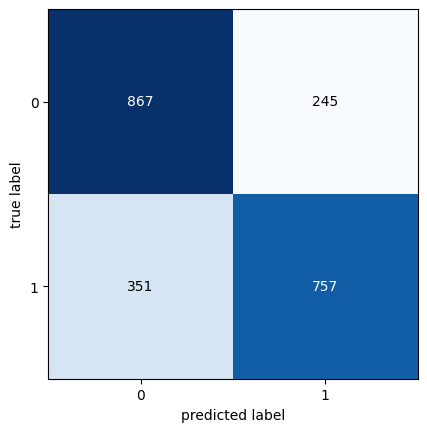

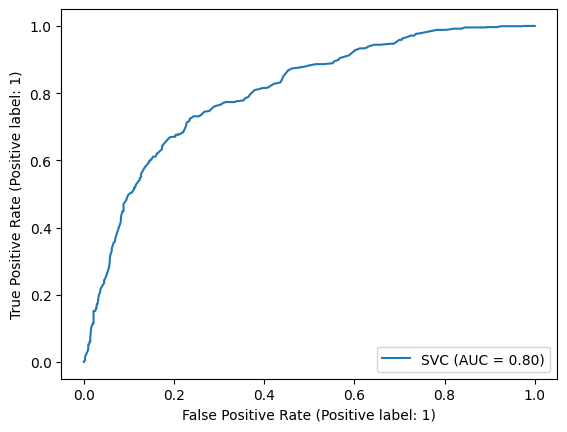

In [53]:
#Evaluasi Support Vector Machine

model7svm=SVC(kernel = 'rbf', C = 1, gamma = 1)
model7svm.fit(x_train_scaled,y_train)
y_pred7 = model7svm.predict(x_test_scaled)
accuracy7svm = accuracy_score(y_test, y_pred7)
precision7svm = precision_score(y_test, y_pred7)
recall7svm = recall_score(y_test, y_pred7)
f1_7svm = f1_score(y_test, y_pred7)
roc_auc7svm = roc_auc_score(y_test, y_pred7)
print("Accuracy = {}".format(accuracy7svm))
print("Precision = {}".format(precision7svm))
print("Recall = {}".format(recall7svm))
print("F1-Score = {}".format(f1_7svm))
print("ROC Area under Curve = {}".format(roc_auc7svm))
print(classification_report(y_test,y_pred7,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred7))
RocCurveDisplay.from_estimator(model7svm , x_test_scaled , y_test)

Accuracy = 0.7707207207207207
Precision = 0.7606614447345518
Recall = 0.7888086642599278
F1-Score = 0.7744793974302171
ROC Area under Curve = 0.7707532529932732
              precision    recall  f1-score   support

           0    0.78151   0.75270   0.76683      1112
           1    0.76066   0.78881   0.77448      1108

    accuracy                        0.77072      2220
   macro avg    0.77109   0.77075   0.77066      2220
weighted avg    0.77111   0.77072   0.77065      2220



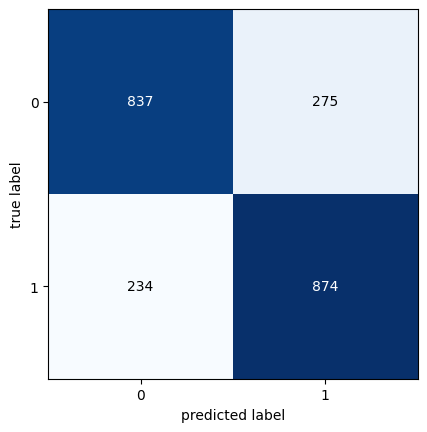

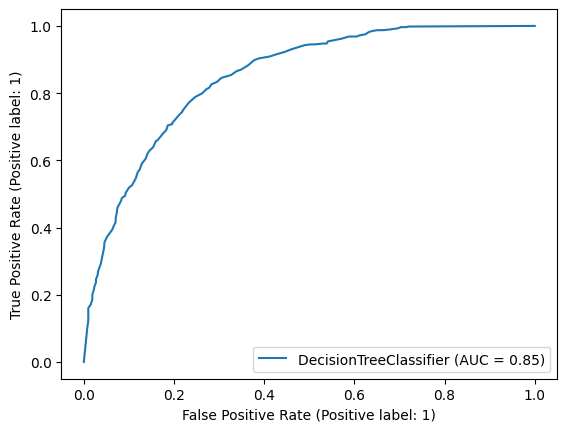

In [54]:
#Evaluasi Decision Tree

model7dt=DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 1, min_samples_split = 10)
model7dt.fit(x_train_scaled,y_train)
y_pred7 = model7dt.predict(x_test_scaled)
accuracy7dt = accuracy_score(y_test, y_pred7)
precision7dt = precision_score(y_test, y_pred7)
recall7dt = recall_score(y_test, y_pred7)
f1_7dt = f1_score(y_test, y_pred7)
roc_auc7dt = roc_auc_score(y_test, y_pred7)
print("Accuracy = {}".format(accuracy7dt))
print("Precision = {}".format(precision7dt))
print("Recall = {}".format(recall7dt))
print("F1-Score = {}".format(f1_7dt))
print("ROC Area under Curve = {}".format(roc_auc7dt))
print(classification_report(y_test,y_pred7,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred7))
RocCurveDisplay.from_estimator(model7dt , x_test_scaled , y_test)

#Skema 8

1. Random Forest
    max_depth = 500
    min_samples_leaf = 5
    min_samples_split = 2

2. SVM
    kernel = rbf
    C = 10
    gamma = 0.1

3. Decision Tree
    max_depth = 500
    max_samples_leaf = 5
    min_samples_split = 2

In [55]:
rf_clf8 = RandomForestClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 2)
svm_clf8 = SVC(kernel = 'rbf', C = 10, gamma = 0.1)
dt_clf8 = DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 2)

In [56]:
clf_list8 = [rf_clf8, svm_clf8, dt_clf8]
clf_name_list8 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list8:
  clf.fit(x_train_scaled, y_train)

In [57]:
train_acc_list8 = []
test_acc_list8 = []

for clf,name in zip(clf_list8,clf_name_list8):
    y_pred_train8 = clf.predict(x_train_scaled)
    y_pred_test8 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train8)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test8)}')
    train_acc_list8.append(accuracy_score(y_train, y_pred_train8))
    test_acc_list8.append(accuracy_score(y_test, y_pred_test8))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)


Using model: Random Forest
Training Score: 0.7791505791505792
Test Score: 0.7693693693693694
Acc Train: 0.7791505791505792
Acc Test: 0.7693693693693694
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.7167953667953668
Test Score: 0.7108108108108108
Acc Train: 0.7167953667953668
Acc Test: 0.7108108108108108
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7806949806949807
Test Score: 0.7684684684684685
Acc Train: 0.7806949806949807
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                               

Accuracy = 0.768918918918919
Precision = 0.7602799650043744
Recall = 0.7842960288808665
F1-Score = 0.772101288316304
ROC Area under Curve = 0.7689465755915124
              precision    recall  f1-score   support

           0    0.77809   0.75360   0.76565      1112
           1    0.76028   0.78430   0.77210      1108

    accuracy                        0.76892      2220
   macro avg    0.76918   0.76895   0.76887      2220
weighted avg    0.76920   0.76892   0.76887      2220



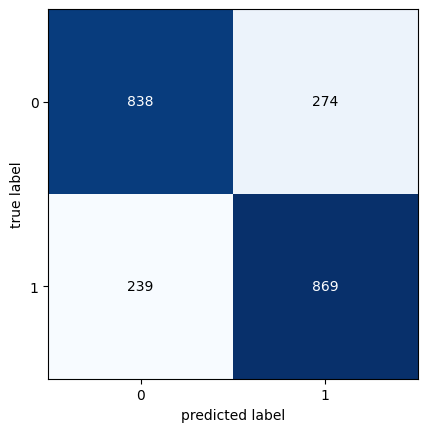

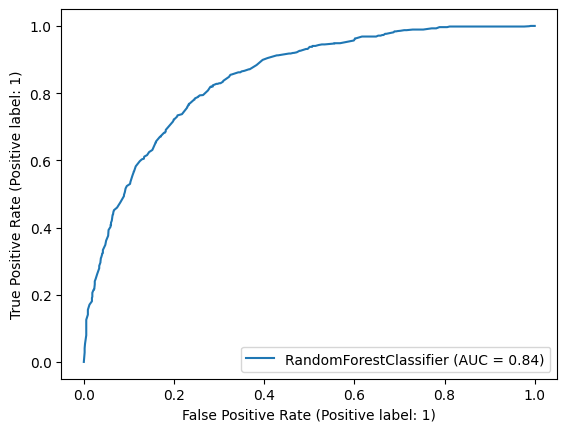

In [58]:
#Evaluasi Random Forest


model8rf=RandomForestClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 2)
model8rf.fit(x_train_scaled,y_train)
y_pred8 = model8rf.predict(x_test_scaled)
accuracy8rf = accuracy_score(y_test, y_pred8)
precision8rf = precision_score(y_test, y_pred8)
recall8rf = recall_score(y_test, y_pred8)
f1_8rf = f1_score(y_test, y_pred8)
roc_auc8rf = roc_auc_score(y_test, y_pred8)
print("Accuracy = {}".format(accuracy8rf))
print("Precision = {}".format(precision8rf))
print("Recall = {}".format(recall8rf))
print("F1-Score = {}".format(f1_8rf))
print("ROC Area under Curve = {}".format(roc_auc8rf))
print(classification_report(y_test,y_pred8,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred8))
RocCurveDisplay.from_estimator(model8rf , x_test_scaled , y_test)


Accuracy = 0.7108108108108108
Precision = 0.7129798903107861
Recall = 0.703971119133574
F1-Score = 0.7084468664850138
ROC Area under Curve = 0.7107985092070748
              precision    recall  f1-score   support

           0    0.70870   0.71763   0.71314      1112
           1    0.71298   0.70397   0.70845      1108

    accuracy                        0.71081      2220
   macro avg    0.71084   0.71080   0.71079      2220
weighted avg    0.71084   0.71081   0.71080      2220



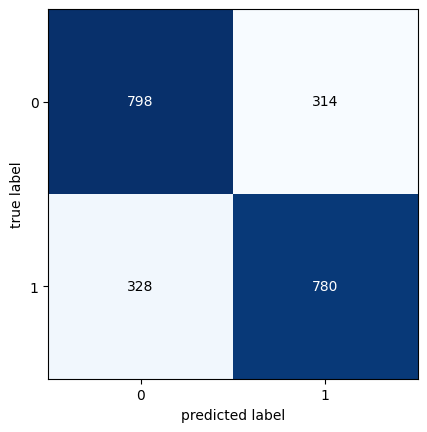

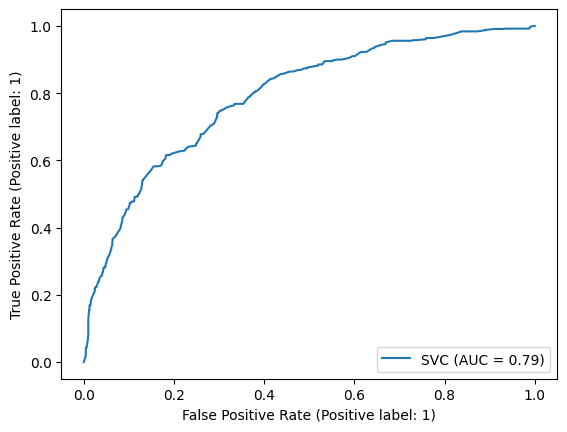

In [59]:
#Evaluasi Support Vector Machine

model8svm=SVC(kernel = 'rbf', C = 10, gamma = 0.1)
model8svm.fit(x_train_scaled,y_train)
y_pred8 = model8svm.predict(x_test_scaled)
accuracy8svm = accuracy_score(y_test, y_pred8)
precision8svm = precision_score(y_test, y_pred8)
recall8svm = recall_score(y_test, y_pred8)
f1_8svm = f1_score(y_test, y_pred8)
roc_auc8svm = roc_auc_score(y_test, y_pred8)
print("Accuracy = {}".format(accuracy8svm))
print("Precision = {}".format(precision8svm))
print("Recall = {}".format(recall8svm))
print("F1-Score = {}".format(f1_8svm))
print("ROC Area under Curve = {}".format(roc_auc8svm))
print(classification_report(y_test,y_pred8,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred8))
RocCurveDisplay.from_estimator(model8svm , x_test_scaled , y_test)

Accuracy = 0.7684684684684685
Precision = 0.7591623036649214
Recall = 0.7851985559566786
F1-Score = 0.7719609582963619
ROC Area under Curve = 0.7684985585538789
              precision    recall  f1-score   support

           0    0.77840   0.75180   0.76487      1112
           1    0.75916   0.78520   0.77196      1108

    accuracy                        0.76847      2220
   macro avg    0.76878   0.76850   0.76841      2220
weighted avg    0.76880   0.76847   0.76841      2220



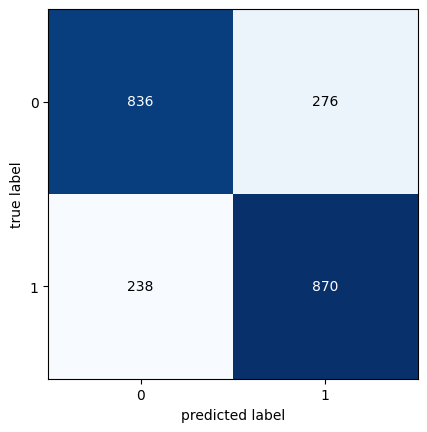

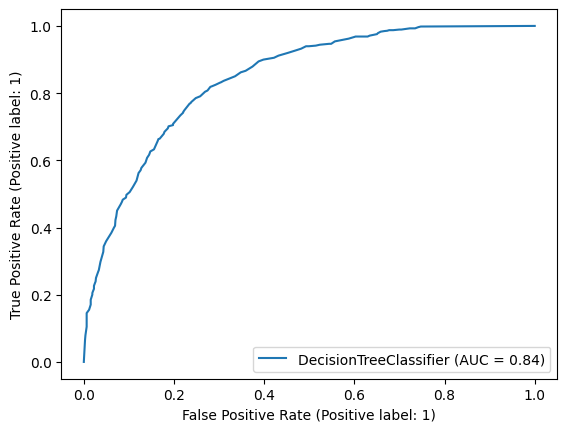

In [60]:
#Evaluasi Decision Tree

model8dt=DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 2)
model8dt.fit(x_train_scaled,y_train)
y_pred8 = model8dt.predict(x_test_scaled)
accuracy8dt = accuracy_score(y_test, y_pred8)
precision8dt = precision_score(y_test, y_pred8)
recall8dt = recall_score(y_test, y_pred8)
f1_8dt = f1_score(y_test, y_pred8)
roc_auc8dt = roc_auc_score(y_test, y_pred8)
print("Accuracy = {}".format(accuracy8dt))
print("Precision = {}".format(precision8dt))
print("Recall = {}".format(recall8dt))
print("F1-Score = {}".format(f1_8dt))
print("ROC Area under Curve = {}".format(roc_auc8dt))
print(classification_report(y_test,y_pred8,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred8))
RocCurveDisplay.from_estimator(model8dt , x_test_scaled , y_test)


#Skema 9
Random Forest max_depth = 500 min_samples_leaf = 5 min_samples_split = 10

SVM kernel = rbf C = 10 gamma = 1

Decision Tree max_depth = 500 max_samples_leaf = 5 min_samples_split = 10

In [61]:
rf_clf9 = RandomForestClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 10)
svm_clf9 = SVC(kernel = 'rbf', C = 10, gamma = 1)
dt_clf9 = DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 10)

In [ ]:
clf_list9 = [rf_clf9, svm_clf9, dt_clf9]
clf_name_list9 = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list9:
  clf.fit(x_train_scaled, y_train)

In [ ]:

train_acc_list9 = []
test_acc_list9 = []

for clf,name in zip(clf_list9,clf_name_list9):
    y_pred_train9 = clf.predict(x_train_scaled)
    y_pred_test9 = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train9)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test9)}')
    train_acc_list9.append(accuracy_score(y_train, y_pred_train9))
    test_acc_list9.append(accuracy_score(y_test, y_pred_test9))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Random Forest
Training Score: 0.7781853281853282
Test Score: 0.7648648648648648
Acc Train: 0.7781853281853282
Acc Test: 0.7648648648648648
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.7596525096525096
Test Score: 0.7527027027027027
Acc Train: 0.7596525096525096
Acc Test: 0.7527027027027027
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7806949806949807
Test Score: 0.7684684684684685
Acc Train: 0.7806949806949807
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                               

Accuracy = 0.7657657657657657
Precision = 0.7525773195876289
Recall = 0.7906137184115524
F1-Score = 0.7711267605633803
ROC Area under Curve = 0.7658104563280784
              precision    recall  f1-score   support

           0    0.78030   0.74101   0.76015      1112
           1    0.75258   0.79061   0.77113      1108

    accuracy                        0.76577      2220
   macro avg    0.76644   0.76581   0.76564      2220
weighted avg    0.76647   0.76577   0.76563      2220



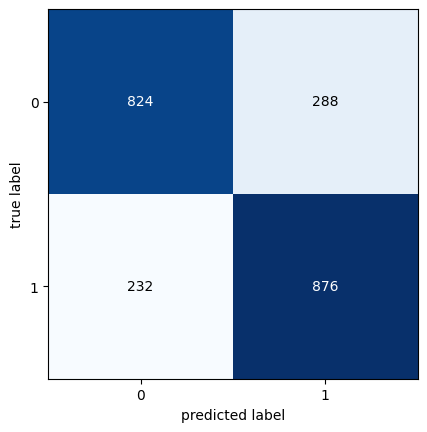

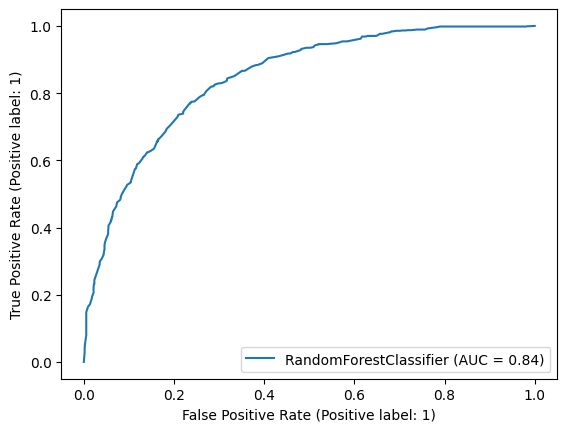

In [ ]:
#Evaluasi Random Forest


model9rf=RandomForestClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 10)
model9rf.fit(x_train_scaled,y_train)
y_pred9 = model9rf.predict(x_test_scaled)
accuracy9rf = accuracy_score(y_test, y_pred9)
precision9rf = precision_score(y_test, y_pred9)
recall9rf = recall_score(y_test, y_pred9)
f1_9rf = f1_score(y_test, y_pred9)
roc_auc9rf = roc_auc_score(y_test, y_pred9)
print("Accuracy = {}".format(accuracy9rf))
print("Precision = {}".format(precision9rf))
print("Recall = {}".format(recall9rf))
print("F1-Score = {}".format(f1_9rf))
print("ROC Area under Curve = {}".format(roc_auc9rf))
print(classification_report(y_test,y_pred9,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred9))
RocCurveDisplay.from_estimator(model9rf , x_test_scaled , y_test)

In [ ]:
#Evaluasi Support Vector Machine

model9svm=SVC(kernel = 'rbf', C = 10, gamma = 1)
model9svm.fit(x_train_scaled,y_train)
y_pred9 = model9svm.predict(x_test_scaled)
accuracy9svm = accuracy_score(y_test, y_pred9)
precision9svm = precision_score(y_test, y_pred9)
recall9svm = recall_score(y_test, y_pred9)
f1_9svm = f1_score(y_test, y_pred9)
roc_auc9svm = roc_auc_score(y_test, y_pred9)
print("Accuracy = {}".format(accuracy9svm))
print("Precision = {}".format(precision9svm))
print("Recall = {}".format(recall9svm))
print("F1-Score = {}".format(f1_9svm))
print("ROC Area under Curve = {}".format(roc_auc9svm))
print(classification_report(y_test,y_pred9,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred9))
RocCurveDisplay.from_estimator(model9svm , x_test_scaled , y_test)

In [ ]:
#Evaluasi Decision Tree

model9dt=DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 5, min_samples_split = 10)
model9dt.fit(x_train_scaled,y_train)
y_pred9 = model9dt.predict(x_test_scaled)
accuracy9dt = accuracy_score(y_test, y_pred9)
precision9dt = precision_score(y_test, y_pred9)
recall9dt = recall_score(y_test, y_pred9)
f1_9dt = f1_score(y_test, y_pred9)
roc_auc9dt = roc_auc_score(y_test, y_pred9)
print("Accuracy = {}".format(accuracy9dt))
print("Precision = {}".format(precision9dt))
print("Recall = {}".format(recall9dt))
print("F1-Score = {}".format(f1_9dt))
print("ROC Area under Curve = {}".format(roc_auc9dt))
print(classification_report(y_test,y_pred9,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred9))
RocCurveDisplay.from_estimator(model9dt , x_test_scaled , y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree dengan parameter yang sesuai
best_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2)

# Melatih model Decision Tree pada data pelatihan yang telah discaling
best_model.fit(x_train_scaled, y_train)

# Gunakan model Decision Tree ini untuk membuat prediksi
predictions = best_model.predict(x_test_scaled)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi skaler
scaler = StandardScaler()

# Melatih skaler dengan data pelatihan
scaler.fit(x_train)

# Simpan skaler ke dalam file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [ ]:
import pickle

# Simpan skaler ke dalam file 'scaler_ds.pkl'
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Simpan model terbaik ke dalam file 'model_ds.pkl'
with open('model_rf.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
